In [1]:
from datasets import *
from train import *
from predict import *
from evaluate import *
from util import *
import numpy as np

# Test monthly stuff from thesis

## Create datasets:

All months:

In [2]:
base_folder = "Datasets"
output_folder = "Output/Reproduce_monthly"

description = {}

description["DATASETS_USED"] = ["isotopes", 
                                "tsurf", 
                                "prec"]

description["PREDICTOR_VARIABLES"] = {"tsurf": ["tsurf"],
                                      "prec": ["prec"]}

description["TARGET_VARIABLES"] = {"isotopes": ["d18O"]}

description["DATASETS_NO_GAPS"] = ["isotopes", 
                                   "tsurf", 
                                   "prec", 
                                   "slp"]

description["CLIMATE_MODEL"] = "iHadCM3"
description["GRID_TYPE"] = "Flat"

description["START_YEAR"] = 850
description["END_YEAR"] = 1850
description["LATITUDES_SLICE"] = [1,-1]

description["SPLIT_YEAR"] = 1750
description["DO_SHUFFLE"] = False

description["PRECIP_WEIGHTING"] = False

description["TIMESCALE"] = "MONTHLY"
description["MONTHS_USED"] = np.sort([0,1,2,3,4,5,6,7,8,9,10,11]).tolist()
description["MONTHS_USED_IN_PREDICTION"] = np.sort([0]).tolist()

In [3]:
create_monthly_dataset(description, base_folder, output_folder)

loading variables


FileExistsError: Specified dataset already exists.

All months, use lagged months in predictions:

In [7]:
base_folder = "Datasets"
output_folder = "Output/Reproduce_monthly"

description = {}

description["DATASETS_USED"] = ["isotopes", 
                                "tsurf", 
                                "prec"]

description["PREDICTOR_VARIABLES"] = {"tsurf": ["tsurf"],
                                      "prec": ["prec"]}

description["TARGET_VARIABLES"] = {"isotopes": ["d18O"]}

description["DATASETS_NO_GAPS"] = ["isotopes", 
                                   "tsurf", 
                                   "prec", 
                                   "slp"]

description["CLIMATE_MODEL"] = "iHadCM3"
description["GRID_TYPE"] = "Flat"

description["START_YEAR"] = 850
description["END_YEAR"] = 1850
description["LATITUDES_SLICE"] = [1,-1]

description["SPLIT_YEAR"] = 1750
description["DO_SHUFFLE"] = False

description["PRECIP_WEIGHTING"] = False

description["TIMESCALE"] = "MONTHLY"
description["MONTHS_USED"] = np.sort([0,1,2,3,4,5,6,7,8,9,10,11]).tolist()
description["MONTHS_USED_IN_PREDICTION"] = np.sort([0,-1]).tolist()

In [8]:
create_monthly_dataset(description, base_folder, output_folder)

loading variables
writing pickle
done
writing dataset description
done


Individual dataset for each month:

In [2]:
base_folder = "Datasets"
output_folder = "Output/Reproduce_monthly"

description = {}

description["DATASETS_USED"] = ["isotopes", 
                                "tsurf", 
                                "prec"]

description["PREDICTOR_VARIABLES"] = {"tsurf": ["tsurf"],
                                      "prec": ["prec"]}

description["TARGET_VARIABLES"] = {"isotopes": ["d18O"]}

description["DATASETS_NO_GAPS"] = ["isotopes", 
                                   "tsurf", 
                                   "prec", 
                                   "slp"]

description["CLIMATE_MODEL"] = "iHadCM3"
description["GRID_TYPE"] = "Flat"

description["START_YEAR"] = 850
description["END_YEAR"] = 1850
description["LATITUDES_SLICE"] = [1,-1]

description["SPLIT_YEAR"] = 1750
description["DO_SHUFFLE"] = False

description["PRECIP_WEIGHTING"] = False

description["TIMESCALE"] = "MONTHLY"
description["MONTHS_USED_IN_PREDICTION"] = np.sort([0]).tolist()

for i in range(12):
    description["MONTHS_USED"] = np.sort([i]).tolist()
    create_monthly_dataset(description, base_folder, output_folder)

loading variables
writing pickle
done
writing dataset description
done
loading variables
writing pickle
done
writing dataset description
done
loading variables
writing pickle
done
writing dataset description
done
loading variables
writing pickle
done
writing dataset description
done
loading variables
writing pickle
done
writing dataset description
done
loading variables
writing pickle
done
writing dataset description
done
loading variables
writing pickle
done
writing dataset description
done
loading variables
writing pickle
done
writing dataset description
done
loading variables
writing pickle
done
writing dataset description
done
loading variables
writing pickle
done
writing dataset description
done
loading variables
writing pickle
done
writing dataset description
done
loading variables
writing pickle
done
writing dataset description
done


# Run experiments on these datasets:

All months.

In [3]:
base_folder = "Datasets"
output_folder = "Output/Reproduce_monthly"

description = {}

description["DATASETS_USED"] = ["isotopes", 
                                "tsurf", 
                                "prec"]

description["PREDICTOR_VARIABLES"] = {"tsurf": ["tsurf"],
                                      "prec": ["prec"]}

description["TARGET_VARIABLES"] = {"isotopes": ["d18O"]}

description["DATASETS_NO_GAPS"] = ["isotopes", 
                                   "tsurf", 
                                   "prec", 
                                   "slp"]

description["CLIMATE_MODEL"] = "iHadCM3"
description["GRID_TYPE"] = "Flat"

description["START_YEAR"] = 850
description["END_YEAR"] = 1850
description["LATITUDES_SLICE"] = [1,-1]

description["SPLIT_YEAR"] = 1750
description["DO_SHUFFLE"] = False

description["PRECIP_WEIGHTING"] = False

description["TIMESCALE"] = "MONTHLY"
description["MONTHS_USED"] = np.sort([0,1,2,3,4,5,6,7,8,9,10,11]).tolist()
description["MONTHS_USED_IN_PREDICTION"] = np.sort([0]).tolist()

### MODEL_TRAINING ###############################################

model_training_description = {}
model_training_description["S_MODE_PREDICTORS"] = ["Pixelwise","Pixelwise"] # how to standardize the given variables
model_training_description["S_MODE_TARGETS"] = ["Pixelwise"]

model_training_description["DATASET_FOLDER"] = output_folder

model_training_description["MODEL_TYPE"] = "UNet_Flat"
model_training_description["CREATE_VALIDATIONSET"] = True
model_training_description["SHUFFLE_VALIDATIONSET"] = True


# training parameters

model_training_description["DEPTH"] = 3
model_training_description["NUM_EPOCHS"] = "early_stopping"  # 20
model_training_description["PATIENCE"] = 5
model_training_description["BATCH_SIZE"] = 8
model_training_description["LEARNING_RATE"] = 5e-3  # 0.002637 # 5e-3  # use either this or default ADAM learning rate

# model parameters
model_training_description["DEPTH"] = 3
model_training_description["IN_CHANNELS"] = len(util.flatten(description["PREDICTOR_VARIABLES"].values()))
model_training_description["CHANNELS_FIRST_CONV"] = 32
model_training_description["OUT_CHANNELS"] = len(util.flatten(description["TARGET_VARIABLES"].values()))
model_training_description["FMAPS"] = (32,32,64,64)


model_training_description["ACTIVATION"] = torch.nn.ReLU
model_training_description["NORMALIZATION"] = torch.nn.BatchNorm2d  # IcoBatchNorm2d 


model_training_description["OPTIMIZER"] = "Adam"

model_training_description["DEVICE"] = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model_training_description["USE_CYLINDRICAL_PADDING"] = True
model_training_description["USE_COORD_CONV"] = True
model_training_description["LOSS"] = "Masked_AreaWeightedMSELoss"

In [4]:
n_runs = 5
for i in range(n_runs):
    model_training_description["RUN_NR"] = i
    unet = train_unet(description, model_training_description, output_folder)
    predict_save_unet(description, model_training_description, output_folder, unet, output_folder)

Starting training
Epoch [1], Iter [1201/1213] Loss: 0.3377
Epoch [2], Iter [1201/1213] Loss: 0.3503
Epoch [3], Iter [1201/1213] Loss: 0.3242
Epoch [4], Iter [1201/1213] Loss: 0.2790
Epoch [5], Iter [1201/1213] Loss: 0.2671
Epoch [6], Iter [1201/1213] Loss: 0.2562
Epoch [7], Iter [1201/1213] Loss: 0.3223
Epoch [8], Iter [1201/1213] Loss: 0.3075
Epoch [9], Iter [1201/1213] Loss: 0.2768
Epoch [10], Iter [1201/1213] Loss: 0.2937
Epoch [11], Iter [1201/1213] Loss: 0.2770
Epoch [12], Iter [1201/1213] Loss: 0.2651
Epoch [13], Iter [1201/1213] Loss: 0.2805
Epoch [14], Iter [1201/1213] Loss: 0.2830
Epoch [15], Iter [1201/1213] Loss: 0.2564
Epoch [16], Iter [1201/1213] Loss: 0.2703
Epoch [17], Iter [1201/1213] Loss: 0.2641
Epoch [18], Iter [1201/1213] Loss: 0.2368
Epoch [19], Iter [1201/1213] Loss: 0.2629
Epoch [20], Iter [1201/1213] Loss: 0.2822
Epoch [21], Iter [1201/1213] Loss: 0.2745
Epoch [22], Iter [1201/1213] Loss: 0.2442
Epoch [23], Iter [1201/1213] Loss: 0.2484
Epoch [24], Iter [1201/12

All months, use previous timestep in prediction

In [5]:
base_folder = "Datasets"
output_folder = "Output/Reproduce_monthly"

description = {}

description["DATASETS_USED"] = ["isotopes", 
                                "tsurf",
                                "prec"]

description["PREDICTOR_VARIABLES"] = {"tsurf": ["tsurf"],
                                      "prec": ["prec"]}

description["TARGET_VARIABLES"] = {"isotopes": ["d18O"]}

description["DATASETS_NO_GAPS"] = ["isotopes", 
                                   "tsurf", 
                                   "prec", 
                                   "slp"]

description["CLIMATE_MODEL"] = "iHadCM3"
description["GRID_TYPE"] = "Flat"

description["START_YEAR"] = 850
description["END_YEAR"] = 1850
description["LATITUDES_SLICE"] = [1,-1]

description["SPLIT_YEAR"] = 1750
description["DO_SHUFFLE"] = False
description["PRECIP_WEIGHTING"] = False


description["TIMESCALE"] = "MONTHLY"
description["MONTHS_USED"] = np.sort([0,1,2,3,4,5,6,7,8,9,10,11]).tolist()
description["MONTHS_USED_IN_PREDICTION"] = np.sort([0,-1]).tolist()

### MODEL_TRAINING ###############################################

model_training_description = {}
model_training_description["S_MODE_PREDICTORS"] = ["Pixelwise","Pixelwise","Pixelwise","Pixelwise"] # how to standardize the given variables
model_training_description["S_MODE_TARGETS"] = ["Pixelwise"]

model_training_description["DATASET_FOLDER"] = output_folder

model_training_description["MODEL_TYPE"] = "UNet_Flat"
model_training_description["CREATE_VALIDATIONSET"] = True
model_training_description["SHUFFLE_VALIDATIONSET"] = True


# training parameters

model_training_description["DEPTH"] = 3
model_training_description["NUM_EPOCHS"] = "early_stopping"  # 20
model_training_description["PATIENCE"] = 5
model_training_description["BATCH_SIZE"] = 8
model_training_description["LEARNING_RATE"] = 5e-3  # 0.002637 # 5e-3  # use either this or default ADAM learning rate

# model parameters
model_training_description["DEPTH"] = 3
model_training_description["IN_CHANNELS"] = len(util.flatten(description["PREDICTOR_VARIABLES"].values()))*2
model_training_description["CHANNELS_FIRST_CONV"] = 32
model_training_description["OUT_CHANNELS"] = len(util.flatten(description["TARGET_VARIABLES"].values()))
model_training_description["FMAPS"] = (32,32,64,64)


model_training_description["ACTIVATION"] = torch.nn.ReLU
model_training_description["NORMALIZATION"] = torch.nn.BatchNorm2d  # IcoBatchNorm2d 


model_training_description["OPTIMIZER"] = "Adam"

model_training_description["DEVICE"] = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model_training_description["USE_CYLINDRICAL_PADDING"] = True
model_training_description["USE_COORD_CONV"] = True
model_training_description["LOSS"] = "Masked_AreaWeightedMSELoss"

In [6]:
n_runs = 5
for i in range(n_runs):
    model_training_description["RUN_NR"] = i
    unet = train_unet(description, model_training_description, output_folder)
    predict_save_unet(description, model_training_description, output_folder, unet, output_folder)

Starting training
Epoch [1], Iter [1201/1212] Loss: 0.3365
Epoch [2], Iter [1201/1212] Loss: 0.3547
Epoch [3], Iter [1201/1212] Loss: 0.3124
Epoch [4], Iter [1201/1212] Loss: 0.2976
Epoch [5], Iter [1201/1212] Loss: 0.2796
Epoch [6], Iter [1201/1212] Loss: 0.2849
Epoch [7], Iter [1201/1212] Loss: 0.2914
Epoch [8], Iter [1201/1212] Loss: 0.2648
Epoch [9], Iter [1201/1212] Loss: 0.2871
Epoch [10], Iter [1201/1212] Loss: 0.2775
Epoch [11], Iter [1201/1212] Loss: 0.2750
Epoch [12], Iter [1201/1212] Loss: 0.2581
Epoch [13], Iter [1201/1212] Loss: 0.2892
Epoch [14], Iter [1201/1212] Loss: 0.2732
Epoch [15], Iter [1201/1212] Loss: 0.2727
Epoch [16], Iter [1201/1212] Loss: 0.2684
Epoch [17], Iter [1201/1212] Loss: 0.3049
Epoch [18], Iter [1201/1212] Loss: 0.2759
Epoch [19], Iter [1201/1212] Loss: 0.2661
Epoch [20], Iter [1201/1212] Loss: 0.2590
Epoch [21], Iter [1201/1212] Loss: 0.3034
Epoch [22], Iter [1201/1212] Loss: 0.2746
Epoch [23], Iter [1201/1212] Loss: 0.2524
Epoch [24], Iter [1201/12

Individual models for different cases:

In [7]:
base_folder = "Datasets"
output_folder = "Output/Reproduce_monthly"

description = {}

description["DATASETS_USED"] = ["isotopes", 
                                "tsurf",
                                "prec"]

description["PREDICTOR_VARIABLES"] = {"tsurf": ["tsurf"],
                                      "prec": ["prec"]}

description["TARGET_VARIABLES"] = {"isotopes": ["d18O"]}

description["DATASETS_NO_GAPS"] = ["isotopes", 
                                   "tsurf", 
                                   "prec", 
                                   "slp"]

description["CLIMATE_MODEL"] = "iHadCM3"
description["GRID_TYPE"] = "Flat"

description["START_YEAR"] = 850
description["END_YEAR"] = 1850
description["LATITUDES_SLICE"] = [1,-1]

description["SPLIT_YEAR"] = 1750
description["DO_SHUFFLE"] = False
description["PRECIP_WEIGHTING"] = False


description["TIMESCALE"] = "MONTHLY"
description["MONTHS_USED_IN_PREDICTION"] = np.sort([0]).tolist()

### MODEL_TRAINING ###############################################

model_training_description = {}
model_training_description["S_MODE_PREDICTORS"] = ["Pixelwise","Pixelwise"] # how to standardize the given variables
model_training_description["S_MODE_TARGETS"] = ["Pixelwise"]

model_training_description["DATASET_FOLDER"] = output_folder

model_training_description["MODEL_TYPE"] = "UNet_Flat"
model_training_description["CREATE_VALIDATIONSET"] = True
model_training_description["SHUFFLE_VALIDATIONSET"] = True


# training parameters

model_training_description["DEPTH"] = 3
model_training_description["NUM_EPOCHS"] = "early_stopping"  # 20
model_training_description["PATIENCE"] = 5
model_training_description["BATCH_SIZE"] = 8
model_training_description["LEARNING_RATE"] = 5e-3  # 0.002637 # 5e-3  # use either this or default ADAM learning rate

# model parameters
model_training_description["DEPTH"] = 3
model_training_description["IN_CHANNELS"] = len(util.flatten(description["PREDICTOR_VARIABLES"].values()))
model_training_description["CHANNELS_FIRST_CONV"] = 32
model_training_description["OUT_CHANNELS"] = len(util.flatten(description["TARGET_VARIABLES"].values()))
model_training_description["FMAPS"] = (32,32,64,64)


model_training_description["ACTIVATION"] = torch.nn.ReLU
model_training_description["NORMALIZATION"] = torch.nn.BatchNorm2d  # IcoBatchNorm2d 


model_training_description["OPTIMIZER"] = "Adam"

model_training_description["DEVICE"] = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model_training_description["USE_CYLINDRICAL_PADDING"] = True
model_training_description["USE_COORD_CONV"] = True
model_training_description["LOSS"] = "Masked_AreaWeightedMSELoss"

In [8]:
n_runs = 5
for j in range(n_runs):
    model_training_description["RUN_NR"] = j
    for i in range(12):
        description["MONTHS_USED"] = np.sort([i]).tolist()
        unet = train_unet(description, model_training_description, output_folder)
        predict_save_unet(description, model_training_description, output_folder, unet, output_folder)

Starting training
Epoch [1], Iter [91/101] Loss: 0.6740
Epoch [2], Iter [91/101] Loss: 0.5675
Epoch [3], Iter [91/101] Loss: 0.5574
Epoch [4], Iter [91/101] Loss: 0.5664
Epoch [5], Iter [91/101] Loss: 0.5560
Epoch [6], Iter [91/101] Loss: 0.5400
Epoch [7], Iter [91/101] Loss: 0.5408
Epoch [8], Iter [91/101] Loss: 0.5206
Epoch [9], Iter [91/101] Loss: 0.4829
Epoch [10], Iter [91/101] Loss: 0.4576
Epoch [11], Iter [91/101] Loss: 0.5028
Epoch [12], Iter [91/101] Loss: 0.4924
Epoch [13], Iter [91/101] Loss: 0.4882
Epoch [14], Iter [91/101] Loss: 0.4959
Epoch [15], Iter [91/101] Loss: 0.4706
Epoch [16], Iter [91/101] Loss: 0.4493
Epoch [17], Iter [91/101] Loss: 0.4709
Epoch [18], Iter [91/101] Loss: 0.4470
Epoch [19], Iter [91/101] Loss: 0.4376
Epoch [20], Iter [91/101] Loss: 0.4094
Epoch [21], Iter [91/101] Loss: 0.4399
Epoch [22], Iter [91/101] Loss: 0.4361
Epoch [23], Iter [91/101] Loss: 0.4306
Epoch [24], Iter [91/101] Loss: 0.4207
Test MSE: 0.5284131169319153
writing predictions
writin

Epoch [2], Iter [91/101] Loss: 0.5877
Epoch [3], Iter [91/101] Loss: 0.6459
Epoch [4], Iter [91/101] Loss: 0.5500
Epoch [5], Iter [91/101] Loss: 0.6005
Epoch [6], Iter [91/101] Loss: 0.5573
Epoch [7], Iter [91/101] Loss: 0.5670
Epoch [8], Iter [91/101] Loss: 0.5714
Epoch [9], Iter [91/101] Loss: 0.5446
Epoch [10], Iter [91/101] Loss: 0.5150
Epoch [11], Iter [91/101] Loss: 0.5462
Epoch [12], Iter [91/101] Loss: 0.4828
Epoch [13], Iter [91/101] Loss: 0.4996
Epoch [14], Iter [91/101] Loss: 0.5065
Epoch [15], Iter [91/101] Loss: 0.5058
Epoch [16], Iter [91/101] Loss: 0.5007
Epoch [17], Iter [91/101] Loss: 0.4582
Epoch [18], Iter [91/101] Loss: 0.4525
Epoch [19], Iter [91/101] Loss: 0.4971
Epoch [20], Iter [91/101] Loss: 0.4593
Epoch [21], Iter [91/101] Loss: 0.4750
Epoch [22], Iter [91/101] Loss: 0.4424
Test MSE: 0.6790149807929993
writing predictions
writing descriptions
done
Starting training
Epoch [1], Iter [91/101] Loss: 0.6702
Epoch [2], Iter [91/101] Loss: 0.5893
Epoch [3], Iter [91/

Epoch [4], Iter [91/101] Loss: 0.6029
Epoch [5], Iter [91/101] Loss: 0.5757
Epoch [6], Iter [91/101] Loss: 0.5616
Epoch [7], Iter [91/101] Loss: 0.5725
Epoch [8], Iter [91/101] Loss: 0.5308
Epoch [9], Iter [91/101] Loss: 0.5067
Epoch [10], Iter [91/101] Loss: 0.5386
Epoch [11], Iter [91/101] Loss: 0.5263
Epoch [12], Iter [91/101] Loss: 0.4832
Epoch [13], Iter [91/101] Loss: 0.4713
Epoch [14], Iter [91/101] Loss: 0.4593
Epoch [15], Iter [91/101] Loss: 0.4881
Test MSE: 0.5687409043312073
writing predictions
writing descriptions
done
Starting training
Epoch [1], Iter [91/101] Loss: 0.6741
Epoch [2], Iter [91/101] Loss: 0.6151
Epoch [3], Iter [91/101] Loss: 0.6518
Epoch [4], Iter [91/101] Loss: 0.5292
Epoch [5], Iter [91/101] Loss: 0.6265
Epoch [6], Iter [91/101] Loss: 0.5665
Epoch [7], Iter [91/101] Loss: 0.5361
Epoch [8], Iter [91/101] Loss: 0.5434
Epoch [9], Iter [91/101] Loss: 0.5207
Epoch [10], Iter [91/101] Loss: 0.5443
Epoch [11], Iter [91/101] Loss: 0.5093
Epoch [12], Iter [91/101]

Epoch [2], Iter [91/101] Loss: 0.6137
Epoch [3], Iter [91/101] Loss: 0.5739
Epoch [4], Iter [91/101] Loss: 0.5732
Epoch [5], Iter [91/101] Loss: 0.5248
Epoch [6], Iter [91/101] Loss: 0.5245
Epoch [7], Iter [91/101] Loss: 0.5317
Epoch [8], Iter [91/101] Loss: 0.5821
Epoch [9], Iter [91/101] Loss: 0.5029
Epoch [10], Iter [91/101] Loss: 0.4929
Epoch [11], Iter [91/101] Loss: 0.4981
Epoch [12], Iter [91/101] Loss: 0.4768
Epoch [13], Iter [91/101] Loss: 0.5054
Epoch [14], Iter [91/101] Loss: 0.4737
Epoch [15], Iter [91/101] Loss: 0.4618
Epoch [16], Iter [91/101] Loss: 0.4415
Epoch [17], Iter [91/101] Loss: 1.5540
Test MSE: 0.5481976270675659
writing predictions
writing descriptions
done
Starting training
Epoch [1], Iter [91/101] Loss: 0.6146
Epoch [2], Iter [91/101] Loss: 0.6168
Epoch [3], Iter [91/101] Loss: 0.5948
Epoch [4], Iter [91/101] Loss: 0.5728
Epoch [5], Iter [91/101] Loss: 0.5694
Epoch [6], Iter [91/101] Loss: 0.5905
Epoch [7], Iter [91/101] Loss: 0.5604
Epoch [8], Iter [91/101] 

Epoch [1], Iter [91/101] Loss: 0.6599
Epoch [2], Iter [91/101] Loss: 0.5963
Epoch [3], Iter [91/101] Loss: 0.5607
Epoch [4], Iter [91/101] Loss: 0.5499
Epoch [5], Iter [91/101] Loss: 0.5505
Epoch [6], Iter [91/101] Loss: 0.5310
Epoch [7], Iter [91/101] Loss: 0.5104
Epoch [8], Iter [91/101] Loss: 0.5005
Epoch [9], Iter [91/101] Loss: 0.4630
Epoch [10], Iter [91/101] Loss: 0.4634
Epoch [11], Iter [91/101] Loss: 0.4713
Epoch [12], Iter [91/101] Loss: 0.4796
Epoch [13], Iter [91/101] Loss: 0.4894
Epoch [14], Iter [91/101] Loss: 0.4373
Epoch [15], Iter [91/101] Loss: 0.4507
Epoch [16], Iter [91/101] Loss: 0.4425
Epoch [17], Iter [91/101] Loss: 0.4386
Epoch [18], Iter [91/101] Loss: 0.4172
Epoch [19], Iter [91/101] Loss: 0.4283
Epoch [20], Iter [91/101] Loss: 0.4105
Epoch [21], Iter [91/101] Loss: 0.4402
Epoch [22], Iter [91/101] Loss: 0.3964
Epoch [23], Iter [91/101] Loss: 0.3993
Epoch [24], Iter [91/101] Loss: 0.3703
Test MSE: 0.5247753262519836
writing predictions
writing descriptions
don

done
Starting training
Epoch [1], Iter [91/101] Loss: 0.7108
Epoch [2], Iter [91/101] Loss: 0.6069
Epoch [3], Iter [91/101] Loss: 0.5899
Epoch [4], Iter [91/101] Loss: 0.5915
Epoch [5], Iter [91/101] Loss: 0.5282
Epoch [6], Iter [91/101] Loss: 0.5610
Epoch [7], Iter [91/101] Loss: 0.5493
Epoch [8], Iter [91/101] Loss: 0.5589
Epoch [9], Iter [91/101] Loss: 0.5046
Epoch [10], Iter [91/101] Loss: 0.5091
Epoch [11], Iter [91/101] Loss: 0.5170
Epoch [12], Iter [91/101] Loss: 0.4845
Epoch [13], Iter [91/101] Loss: 0.5104
Epoch [14], Iter [91/101] Loss: 0.4842
Epoch [15], Iter [91/101] Loss: 0.4971
Epoch [16], Iter [91/101] Loss: 0.4685
Epoch [17], Iter [91/101] Loss: 0.4819
Epoch [18], Iter [91/101] Loss: 0.4405
Epoch [19], Iter [91/101] Loss: 0.4573
Epoch [20], Iter [91/101] Loss: 0.4599
Epoch [21], Iter [91/101] Loss: 0.4177
Epoch [22], Iter [91/101] Loss: 0.4334
Test MSE: 0.5439441204071045
writing predictions
writing descriptions
done
Starting training
Epoch [1], Iter [91/101] Loss: 0.58

Epoch [1], Iter [91/101] Loss: 0.7134
Epoch [2], Iter [91/101] Loss: 0.6508
Epoch [3], Iter [91/101] Loss: 0.5724
Epoch [4], Iter [91/101] Loss: 0.5545
Epoch [5], Iter [91/101] Loss: 0.5979
Epoch [6], Iter [91/101] Loss: 0.5674
Epoch [7], Iter [91/101] Loss: 0.5178
Epoch [8], Iter [91/101] Loss: 0.5358
Epoch [9], Iter [91/101] Loss: 0.5194
Epoch [10], Iter [91/101] Loss: 0.4833
Epoch [11], Iter [91/101] Loss: 0.5427
Epoch [12], Iter [91/101] Loss: 0.4940
Epoch [13], Iter [91/101] Loss: 0.4733
Epoch [14], Iter [91/101] Loss: 0.4454
Epoch [15], Iter [91/101] Loss: 0.4298
Epoch [16], Iter [91/101] Loss: 0.4813
Epoch [17], Iter [91/101] Loss: 0.4502
Epoch [18], Iter [91/101] Loss: 0.4390
Epoch [19], Iter [91/101] Loss: 0.4450
Epoch [20], Iter [91/101] Loss: 0.4307
Test MSE: 0.5665153861045837
writing predictions
writing descriptions
done
Starting training
Epoch [1], Iter [91/101] Loss: 0.6747
Epoch [2], Iter [91/101] Loss: 0.6029
Epoch [3], Iter [91/101] Loss: 0.6282
Epoch [4], Iter [91/10

# Evaluate:

In [4]:
base_folder = "Datasets"
output_folder = "Output/Reproduce_monthly"

c_all = {
    "DATASET_DESCRIPTION": {'MONTHS_USED': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
                            'MONTHS_USED_IN_PREDICTION': [0]},
    "MODEL_TRAINING_DESCRIPTION": {}
}

descriptions, predictions, gt, masks = load_data_for_comparison(output_folder, c_all, do_split=True)

c_all_use_p = {
    "DATASET_DESCRIPTION": {'MONTHS_USED': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
                            'MONTHS_USED_IN_PREDICTION': [-1, 0]},
    "MODEL_TRAINING_DESCRIPTION": {}
}

descriptions_p, predictions_p, gt_p, masks_p = load_data_for_comparison(output_folder, c_all_use_p, do_split=True)

5 matching runs found
5 matching runs found


In [5]:
r2_single = []

for i in range(12):
    r2_single.append([])
    c_single = {
        "DATASET_DESCRIPTION": {'MONTHS_USED': [i],
                                'MONTHS_USED_IN_PREDICTION': [0]},
        "MODEL_TRAINING_DESCRIPTION": {}
    }
    descriptions_s, predictions_s, gt_s, masks_s = load_data_for_comparison(output_folder, c_single, do_split=True)
    for j in range(3):
        r2 = get_r2(predictions_s[j][i], gt_s[j][i], masks_s[j][i])
        r2_single[-1].append(get_weighted_average(r2, descriptions[j]["DATASET_DESCRIPTION"])[0])
        
r2_single = np.mean(np.array(r2_single),axis=1)

5 matching runs found
5 matching runs found
5 matching runs found
5 matching runs found
5 matching runs found
5 matching runs found
5 matching runs found
5 matching runs found
5 matching runs found
5 matching runs found
5 matching runs found
5 matching runs found


In [6]:
r2_all = []
r2_all_use_p = []

for j in range(3):
    r2_all.append([])
    r2_all_use_p.append([])
    for i in range(12):
        r2 = get_r2(predictions[j][i], gt[j][i], masks[j][i])
        r2_p = get_r2(predictions_p[j][i], gt_p[j][i], masks_p[j][i])
        r2_all[-1].append(get_weighted_average(r2, descriptions[j]["DATASET_DESCRIPTION"])[0])
        r2_all_use_p[-1].append(get_weighted_average(r2_p, descriptions_p[j]["DATASET_DESCRIPTION"])[0])
        
r2_all = np.mean(np.array(r2_all),axis=0)
r2_all_use_p = np.mean(np.array(r2_all_use_p),axis=0)

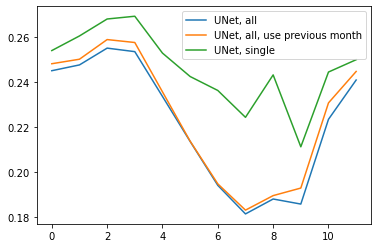

In [8]:
import matplotlib.pyplot as plt

plt.plot(r2_all, label="UNet, all")
plt.plot(r2_all_use_p, label="UNet, all, use previous month")
plt.plot(r2_single, label="UNet, single")
plt.legend()